In [59]:
from datetime import datetime
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

In [8]:
datetime(2017, 1,1,1,).timestamp()

1483200000.0

In [2]:
def get_historial_price (start, end, token='bitcoin'):
    start = datetime.strptime(start, '%Y-%m-%d').timestamp()
    end = datetime.strptime(end, '%Y-%m-%d').timestamp()

    api_url = f'https://api.coingecko.com/api/v3//coins/{token}/market_chart/range?vs_currency=usd&from={start}&to={end}'
    response = requests.get(api_url)

    dataframe = pd.DataFrame(json.loads(response.text)['prices'], columns=['date',token])
    dataframe['date'] = pd.to_datetime(dataframe.date, unit='ms')
    dataframe.set_index('date', inplace=True)
    return dataframe

In [3]:
btc = get_historial_price(start='2016-10-30', end='2022-10-30', token='bitcoin')
eth = get_historial_price(start='2016-10-30', end='2022-10-30', token='ethereum')

In [4]:
dataframe = pd.merge(btc, eth, left_on= btc.index, right_on= eth.index)
dataframe.set_index('key_0', inplace=True)

<AxesSubplot: xlabel='key_0'>

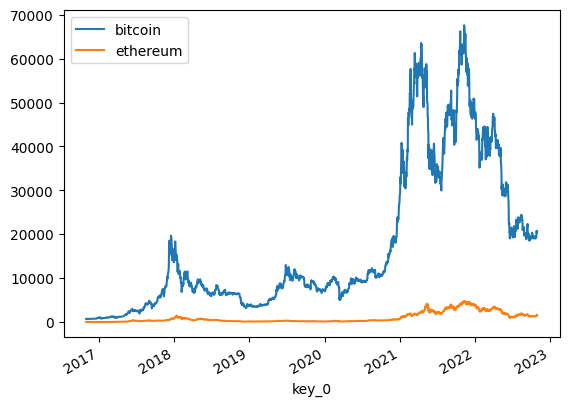

In [12]:
dataframe.plot()

In [7]:
pct_dataframe = dataframe.pct_change()

In [18]:
pct_30_mad = (pct_dataframe - pct_dataframe.rolling(30).mean())

array([[<AxesSubplot: title={'center': 'bitcoin'}>,
        <AxesSubplot: title={'center': 'ethereum'}>]], dtype=object)

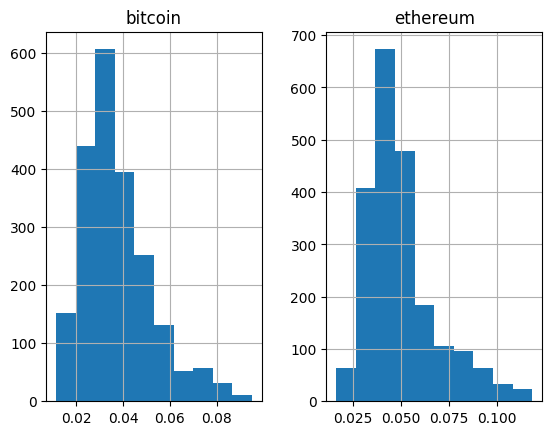

In [26]:
pct_30_mad.rolling(30).std().hist()

<AxesSubplot: xlabel='key_0'>

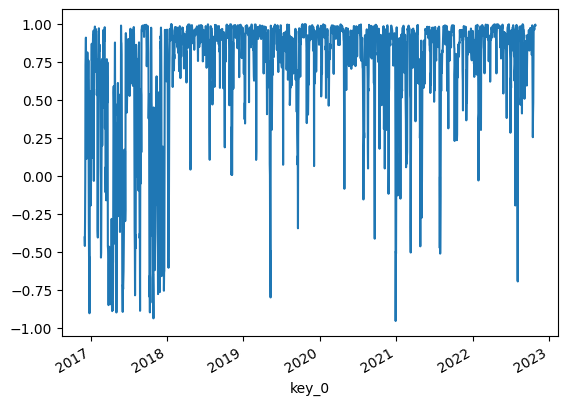

In [22]:
pct_30_mad.bitcoin.rolling(5).corr(pct_30_mad.ethereum).plot()

In [28]:
pct_dataframe.diff = pct_dataframe.ethereum - pct_dataframe.bitcoin

In [33]:
mv = pct_dataframe.diff.cumsum()

In [74]:
joint = pd.merge(pct_dataframe, pct_30_mad, left_on=pct_dataframe.index, right_on=pct_30_mad.index, suffixes=('', '_mad')).dropna().set_index('key_0')

In [77]:
joint_1 = joint.merge(joint.ethereum.shift(-1), left_on=joint.index, right_on = joint.ethereum.shift(-1).index, suffixes=('0','1'))

<AxesSubplot: xlabel='ethereum_mad', ylabel='ethereum1'>

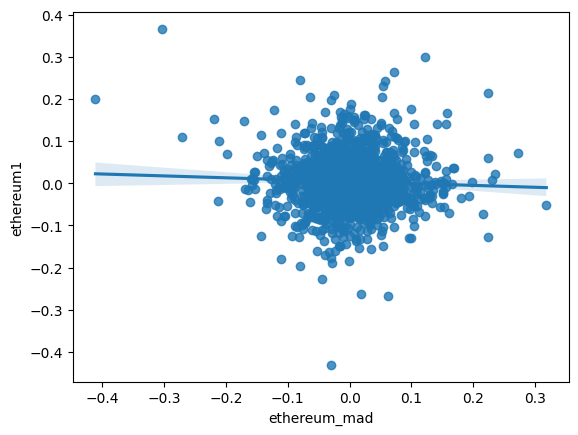

In [84]:
sns.regplot(joint_1, x='ethereum_mad', y='ethereum1')

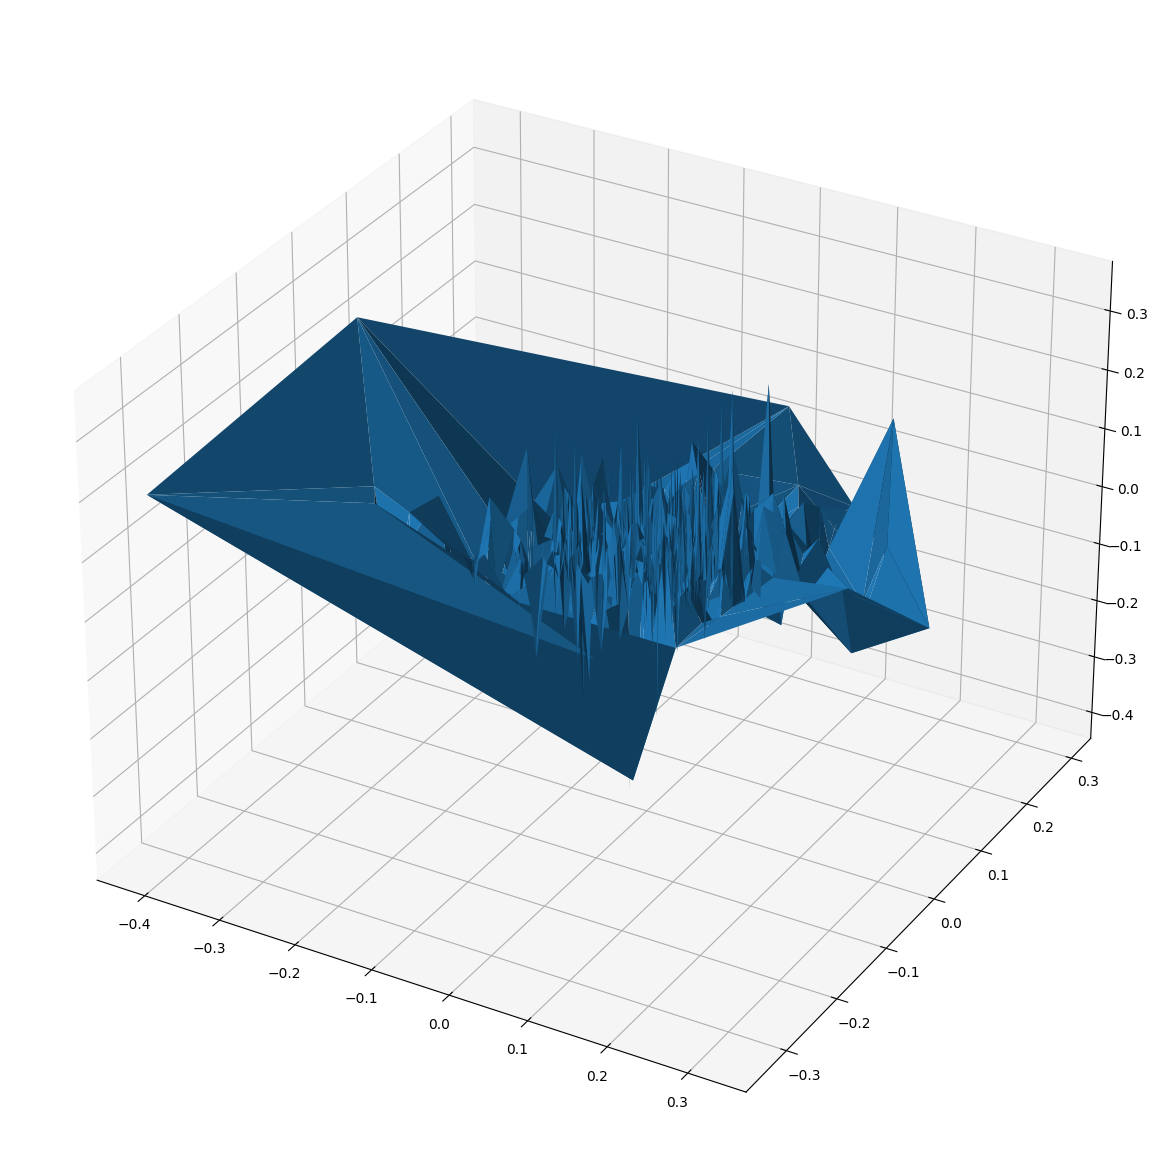

In [66]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.plot_trisurf (joint.ethereum_mad, joint.bitcoin_mad, joint.ethereum.shift(-1))

In [64]:
joint.ethereum.shift(-1)

key_0
2016-11-29    0.060264
2016-11-30   -0.024320
2016-12-01   -0.095010
2016-12-02    0.033347
2016-12-03   -0.053657
                ...   
2022-10-25    0.088373
2022-10-26    0.072979
2022-10-27   -0.034348
2022-10-28    0.026514
2022-10-29         NaN
Name: ethereum, Length: 2157, dtype: float64